<a href="https://colab.research.google.com/github/edytamejlun123/UczenieMaszynowe/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)['frame']

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [58]:
print("ile wierszy: ", len(data))

ile wierszy:  20640


In [59]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.arange(80).reshape((20, 4))  # tablica zawierajace atrybuty warunkowe
# y = range(5)  # tablica zawierajaca jeden atrybut decyzyjny
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


len(X), len(X_train), len(X_test)
assert len(X) == len(X_train) + len(X_test)

X = np.arange(80).reshape((20, 4))  # tablica zawierajace atrybuty warunkowe
y = range(20)  # tablica zawierajaca jeden atrybut decyzyjny
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
len(X_train), len(y_train), len(X_test), len(y_test)

(16, 16, 4, 4)

In [61]:
data_size = len(data)
half_data_size = data_size // 2
data['decision'] = np.array([0] * half_data_size + [1] * half_data_size)

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

In [63]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
output_col = 'decision'

for train_idx, test_idx in splitter.split(data.loc[:, data.columns != output_col], data[output_col]):
  print(f'{train_idx}\n{test_idx}\n{len(train_idx)}, {len(test_idx)}\n------------------\n')

[ 2034 16869 17126 ... 12911  4065 13841]
[16345 12703  3897 ...  1062 17556 12535]
16512, 4128
------------------



In [64]:
print(f'{len(test_idx)+len(train_idx)} / {len(data)}')

20640 / 20640


In [65]:
for train_idx, test_idx in splitter.split(data.loc[:, data.columns != output_col], data[output_col]):
  print(f'{data.iloc[train_idx]}\n{data.iloc[test_idx]}\n{len(train_idx)}, {len(test_idx)}\n------------------\n')

        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2034    1.6325      39.0  4.272388   1.005597      1685.0  3.143657     36.73   
16869   5.7398      42.0  6.282353   1.027451       705.0  2.764706     37.61   
17126   3.2642      31.0  4.397260   1.121331      1711.0  3.348337     37.46   
5324    4.8618      22.0  5.018963   1.101138      1588.0  2.007585     34.05   
1216    2.9821      19.0  5.278947   1.236842       538.0  2.831579     38.24   
...        ...       ...       ...        ...         ...       ...       ...   
16163   3.9954      52.0  4.655263   1.089474      1032.0  2.715789     37.77   
18081  10.7958      25.0  7.950089   0.985740      1608.0  2.866310     37.27   
12911   6.2440      31.0  6.828947   0.942982      1121.0  2.458333     38.62   
4065    4.6420       7.0  4.854503   1.133949      2381.0  1.832948     34.15   
13841   2.6125      26.0  5.213152   1.124717      1259.0  2.854875     34.53   

       Longitude  MedHouseV

In [66]:
print(f'{len(test_idx)+len(train_idx)} / {len(data)}')

20640 / 20640


Zadanie 1.

Przygotować funkcję get_dataset(name: str) -> pd.DataFrame, która zwróci ramkę danych z wczytanym zbiorem danych dostępnym w pakiecie Scikit-learn. Jako nazwę można przyjąć dowolny identyfikator, np. alias w adresie URL prowadzącym do szczegółów zbioru:

 https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset (alias jest dostępny po znaku #).

In [67]:
import pandas as pd
from sklearn.datasets import fetch_openml

def get_dataset(name: str) -> pd.DataFrame:
  datas = fetch_openml(as_frame=True, name= name, parser='auto')['frame']
  df = pd.DataFrame(data= datas)
  return df
  # return datas

data_2 = get_dataset('olivetti_faces')
data_2

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,class
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39


Zadanie 2.

Dokonać podziału podzbioru treningowego w stosunku 80%:20% przeznaczając 20% na podzbiór walidacyjny, gdzie pozostałe 80% nadal będzie stanowiło podzbiór treningowy, lecz okrojony.

In [68]:
# WARSTWOWY
data_size_2 = len(data_2)
half_data_size_2 = data_size_2 // 2
data_2['decision'] = np.array([0] * half_data_size_2 + [1] * half_data_size_2)
splitter_2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
output_col = 'decision'

# for train_idx, test_idx in splitter_2.split(data_2.loc[:, data_2.columns != output_col], data_2[output_col]):
#   print(f'{train_idx}\n{test_idx}\n{len(train_idx)}, {len(test_idx)}\n------------------\n')
data_2

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,class,decision
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39,1
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39,1
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39,1
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39,1


In [69]:
# podział prosty
X_train, X_test = train_test_split(data_2, test_size=0.2, random_state=42)


len(data_2), len(X_train), len(X_test)
assert len(data_2) == len(X_train) + len(X_test)


len(X_train), len(X_test)


(320, 80)

Zadanie 3.

Dla przeprowadzonych podziałów metodą prostą oraz warstwową (dla każdego podziału) przygotować histogram prezentujący rozkład liczebności wartości atrybutu decyzyjnego zarówno w podzbiorze treningowym, jak i testowym.

array([[<Axes: title={'center': 'decision'}>]], dtype=object)

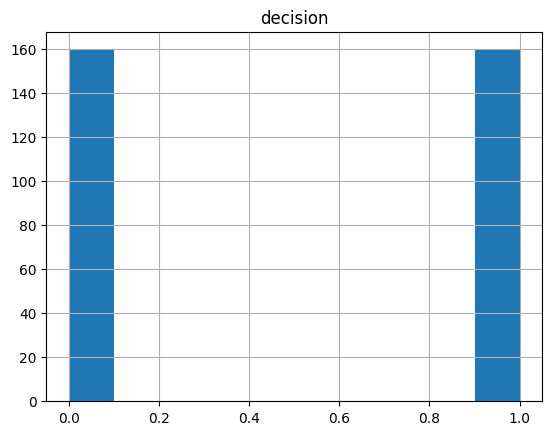

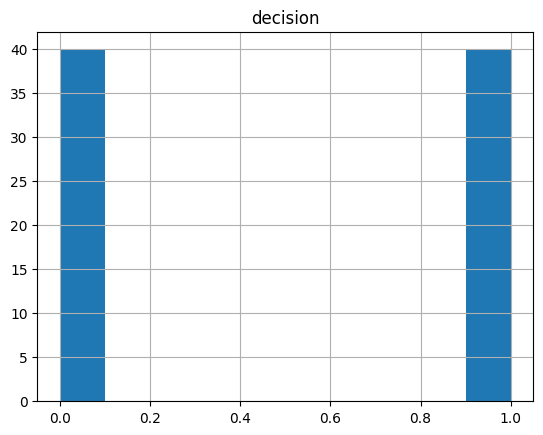

In [70]:
import matplotlib.pyplot as plt
# wartwowy
for train_idx, test_idx in splitter_2.split(data_2.loc[:, data_2.columns != output_col], data_2[output_col]):
  train_data = data_2.iloc[train_idx]
  test_data = data_2.iloc[test_idx]

hist_train_warst = train_data.hist(column=output_col)

hist_test_warst = test_data.hist(column=output_col)

hist_train_warst
hist_test_warst

array([[<Axes: title={'center': 'decision'}>]], dtype=object)

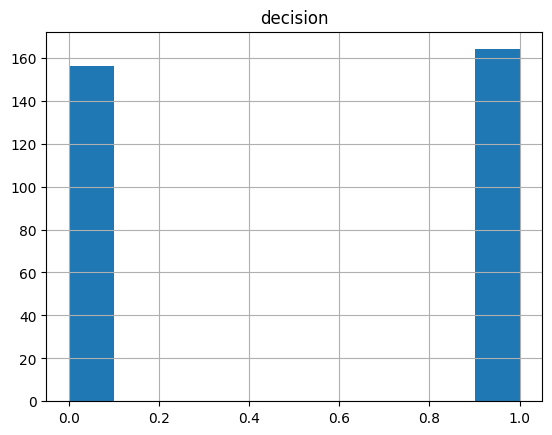

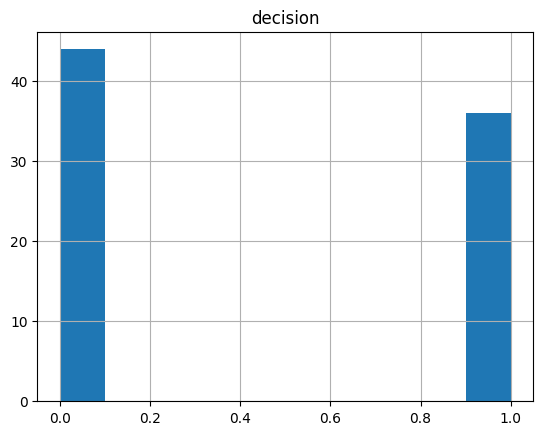

In [71]:
# PROSTY
hist_train__pros = X_train.hist(column=output_col)

hist_test_pros = X_test.hist(column=output_col)

hist_train__pros
hist_test_pros

Zadanie 4.

Dokonać podziału oryginalnego zbioru danych metodą warstwową względem innego atrybutu (obecnego w pierwotnej wersji zbioru). Jakiego atrybutu i dlaczego warto użyć? Dopuszczalne są niewielkie i uzasadnione zmiany wartości atrybutu stanowiącego źródło proporcji podziału.

category


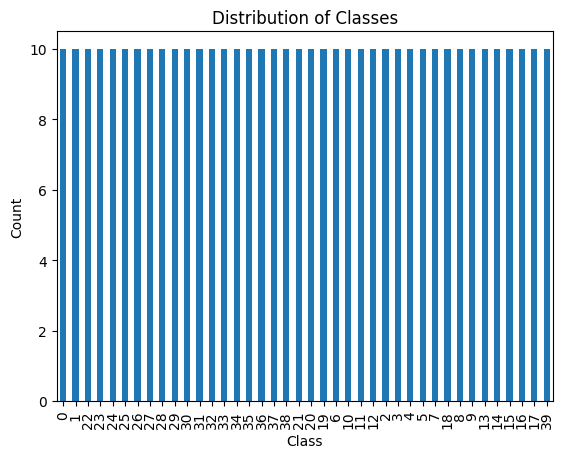

In [72]:
# wartwowy
for train_idx, test_idx in splitter_2.split(data_2.loc[:, data_2.columns != 'class'], data_2['class']):
  train_data = data_2.iloc[train_idx]
  test_data = data_2.iloc[test_idx]

print(data_2['class'].dtype)
class_counts = data_2['class'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

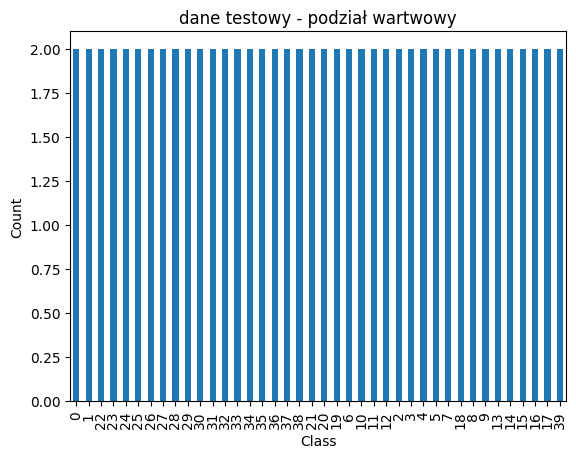

In [73]:
class_counts = test_data['class'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('dane testowy - podział wartwowy')
plt.show()

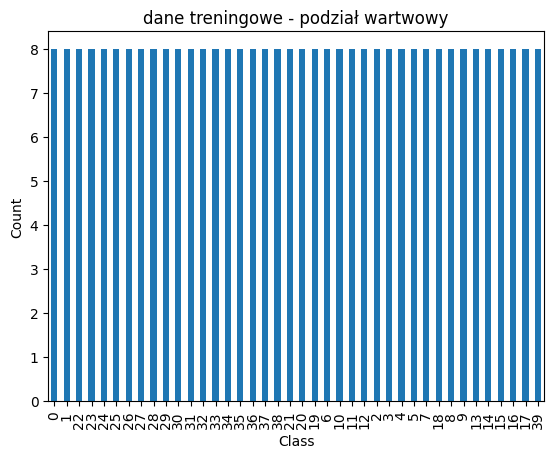

In [74]:
class_counts = train_data['class'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('dane treningowe - podział wartwowy')
plt.show()

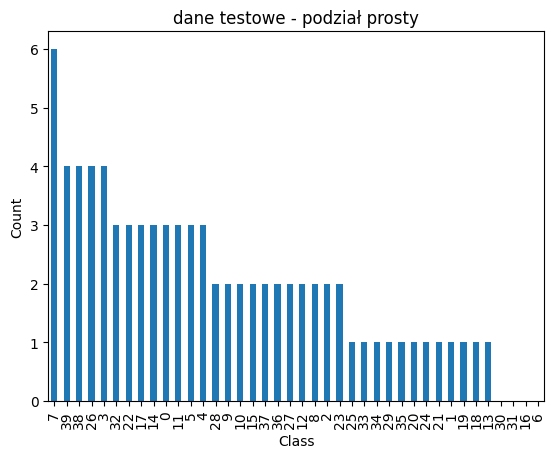

In [75]:
class_counts = X_test['class'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('dane testowe - podział prosty')
plt.show()

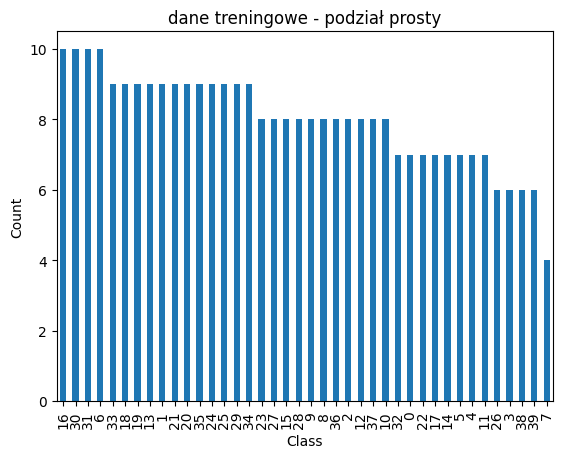

In [76]:
class_counts = X_train['class'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('dane treningowe - podział prosty')
plt.show()